<a href="https://colab.research.google.com/github/dotimothy/astronomy/blob/main/analysis/LightPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LightPollution Visualization 💡

This notebook aims to explore light pollution data over periods of time to explore how it is growing over the years. Additionally, this notebook aims to export the data such that it can be visualized in a geographical atlas [1].

**Author**: [Timothy Do](https://timothydo.me)

## References
[1] P. Cinzano, F. Falchi, and C. D. Elvidge, ‘The first World Atlas of the artificial night sky brightness’, Monthly Notices of the Royal Astronomical Society, vol. 328, no. 3, pp. 689–707, 12 2001. <br>
[2] C. D. Elvidge, K. E. Baugh, M. Zhizhin, and F.-C. Hsu, “Why VIIRS data are superior to DMSP for mapping nighttime lights,” Asia-Pacific Advanced Network 35, vol. 35, p. 62, 2013. <br>
[3] D. J. Lorenz, "Light Pollution Atlas 2022," [Online]. Available: https://djlorenz.github.io/astronomy/lp2022/

## Dependencies

In [1]:
IN_COLAB = True
try: 
    import google.colab
except: 
    IN_COLAB = False
print(f'In CoLab: {IN_COLAB}')

In CoLab: False


In [2]:
if(IN_COLAB):
    !curl https://raw.githubusercontent.com/dotimothy/astronomy/main/requirements.txt -o ./requirements.txt
    !pip install -r requirements.txt
else:
    !pip install -r ../requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Dependencies
import os
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
from tqdm import tqdm
import earthaccess
import h5py

In [4]:
# Helper Functions
def normalize(array):
    return (array - array.min())/(array.max()-array.min())

## Downloading the Data
For processing the light pollution data, we will be using NASA VIIRS DNB. Before proceeding, make sure you have a [NASA Earthdata](https://urs.earthdata.nasa.gov/home) account.

In [5]:
# Creating Directory to Store the Data
dataDir = '../data/lightpollution'
os.makedirs(dataDir,exist_ok=True)

In the earthdata library, you need to log into your NASA Earthdata account.

In [6]:
# Authenticate with your Earthdata Login credentials
logged_in = False
auth = None
attempts = 0
while(not(logged_in)):
    attempts += 1
    auth = earthaccess.login()
    logged_in = auth.authenticated
    if(not(logged_in)): print('Login Failed. Try Again.')
    if(attempts == 3): break
print(f'Earthdata Logged In: {logged_in}')

Enter your Earthdata Login username:  dotimothy
Enter your Earthdata password:  ········


Earthdata Logged In: True


In [7]:
results = earthaccess.search_data(
    short_name='VNP46A1',
    temporal=('2024-12-20','2024-12-20'),
    count=1
)

h5files = earthaccess.download(results, dataDir)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
testFile = h5files[0]
with h5py.File(testFile,'r') as f:
    print(f['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields'].keys())
    dnb = f['HDFEOS']['GRIDS']['VNP_Grid_DNB']['Data Fields']['DNB_At_Sensor_Radiance_500m'][:].astype(np.float32)
    print(f'Radiance Shape: {dnb.shape}') 
    print(f'Radiance Data Type: {dnb.dtype}')

<KeysViewHDF5 ['BrightnessTemperature_M12', 'BrightnessTemperature_M13', 'BrightnessTemperature_M15', 'BrightnessTemperature_M16', 'DNB_At_Sensor_Radiance_500m', 'Glint_Angle', 'Granule', 'Lunar_Azimuth', 'Lunar_Zenith', 'Moon_Illumination_Fraction', 'Moon_Phase_Angle', 'QF_Cloud_Mask', 'QF_DNB', 'QF_VIIRS_M10', 'QF_VIIRS_M11', 'QF_VIIRS_M12', 'QF_VIIRS_M13', 'QF_VIIRS_M15', 'QF_VIIRS_M16', 'Radiance_M10', 'Radiance_M11', 'Sensor_Azimuth', 'Sensor_Zenith', 'Solar_Azimuth', 'Solar_Zenith', 'UTC_Time']>
Radiance Shape: (2400, 2400)
Radiance Data Type: float32


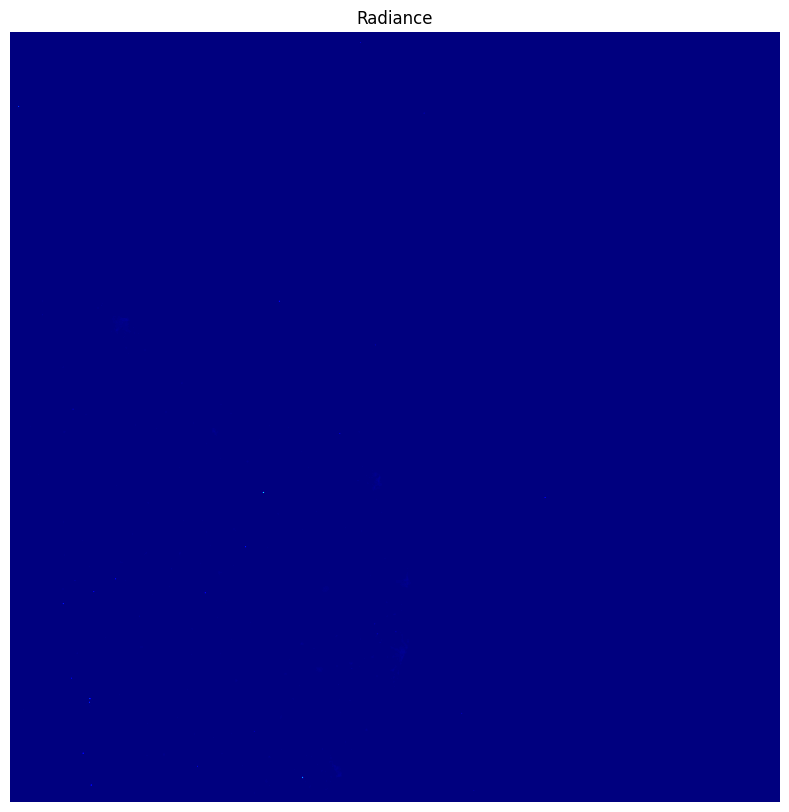

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(normalize(dnb),cmap='jet')
plt.title('Radiance')
plt.axis('off')
plt.show() 